In [1]:
!pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### 1. Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [3]:
df = pd.read_csv("../week2/2017_jun_final.csv")

### 2. Прочитайте отриману таблицю, використовуючи метод head

In [4]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


<Axes: xlabel='Город', ylabel='count'>

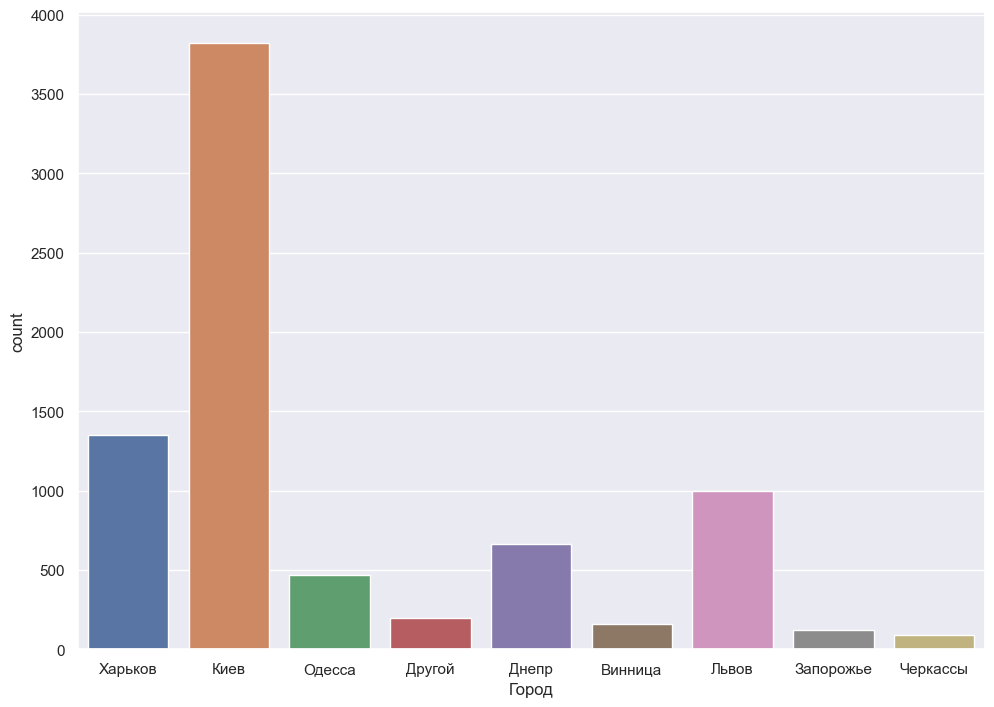

In [5]:
# langs = df.groupby(["Город"]).agg('count').sort_values(by=['N'], ascending=False)
# y = langs["N"][:10]
# x = langs.index.values[:10]
# print(x)
# print(y)
sns.set(rc={'figure.figsize':(11.7,8.27)})
city_df = df[df.Город.isin(['Киев','Харьков', 'Львов', 'Днепр', 'Одесса', 'Винница',
 'Запорожье', 'Черкассы', 'Другой' ])]
# print(city_df )
sns.countplot(x=city_df.Город, data=df)

### 3. Визначте розмір таблиці за допомогою методу shape

In [6]:
df.shape

(8704, 25)

### 4. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

### 5. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
pd.isnull(df).sum(0)

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

### 6. Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [9]:
col_to_ignore = df.isna().any()
col_to_ignore['Язык.программирования'] = False
df = df.loc[:, ~col_to_ignore]
df.head(5)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


# Top 7 languages pie chart

[]

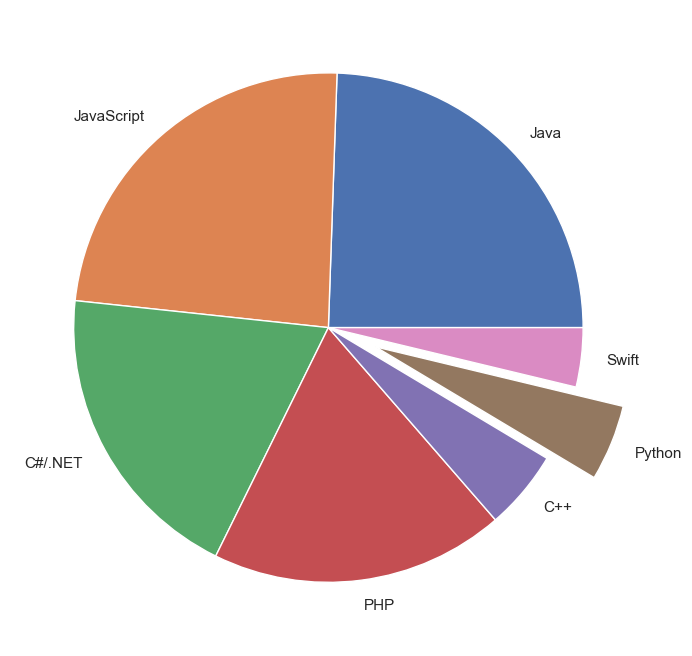

In [10]:
langs = df.groupby(["Язык.программирования"]).agg('count').sort_values(by=['N'], ascending=False)
y = langs["N"][:7]
x = langs.index.values[:7]

explode = [0.2 if t=="Python" else 0 for t in x]
plt.pie(y,explode=explode, labels=x)
plt.plot()


### 7. Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [11]:
pd.isnull(df).sum(0)

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

### 8. Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [12]:
df.dropna(inplace=True)

### 9. Визначте новий розмір таблиці за допомогою методу shape

In [13]:
df.shape

(4854, 20)

### 10. Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [14]:
python_data = df[df['Язык.программирования']=='Python']
python_data.head(5)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


### 11. Визначте розмір таблиці python_data за допомогою методу shape

In [15]:
python_data.shape

(207, 20)

### 12. Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [16]:
python_data_grouped = python_data.groupby(['Должность'])

### 13. Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [17]:
python_data_grouped.agg({'Зарплата.в.месяц':['min','max','mean']})

Зарплата.в.месяц                   
                                      min   max         mean
Должность                                                   
Junior Software Engineer              100  1250   560.841270
Senior Software Engineer             1300  9200  3387.096774
Software Engineer                     500  5400  1799.070000
System Architect                     3000  5000  4000.000000
Technical Lead                       1425  6200  3165.909091

### 14. Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [18]:
def fill_avg_salary(df, position):
#     print(1)
#     print(df)
#     print(position)
    return df[df["Должность"]==position].mean().loc["Зарплата.в.месяц"]

python_data.insert(20, "avg",  python_data.apply(
    lambda x: fill_avg_salary(python_data, x.loc["Должность"]), axis=1), True)


python_data.head(3)


,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,avg
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,1799.07000
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,1799.07000
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,560.84127


# Salary vs Experience

[Text(0.5, 0, 'Experience (year)'), Text(0, 0.5, 'Monthly salary (USD)')]

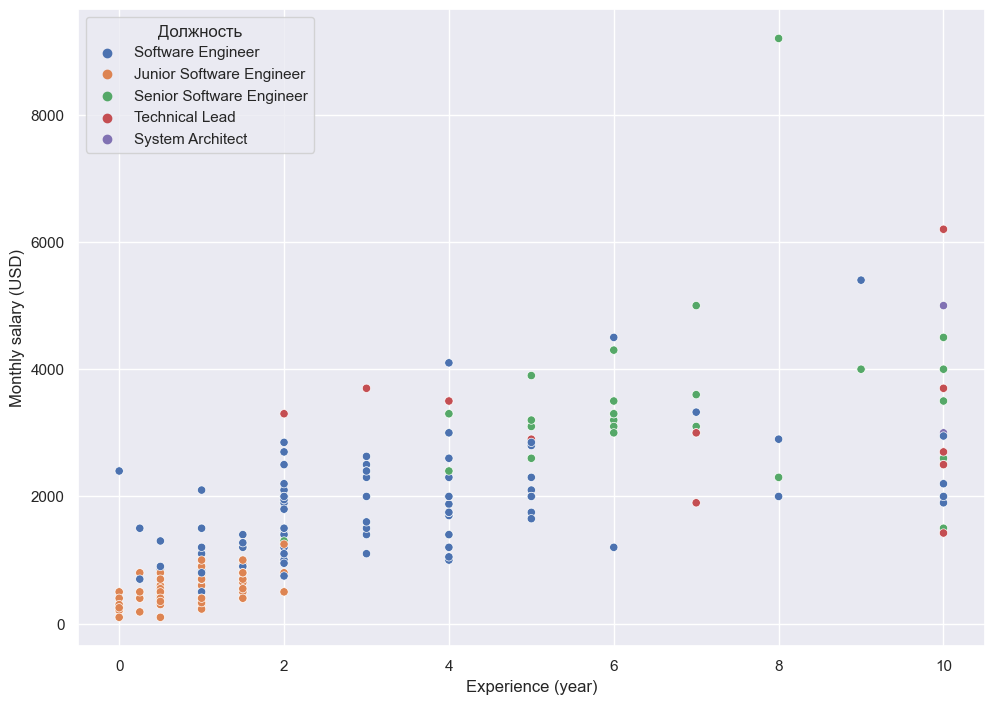

In [19]:
fig = sns.scatterplot(data=python_data, x="exp", y="Зарплата.в.месяц", hue="Должность")
fig.set(xlabel='Experience (year)', ylabel='Monthly salary (USD)')

### 15. Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [20]:
python_data.avg.describe()

count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64

### 16. Збережіть отриману таблицю в CSV файл